In [12]:
import pandas as pd

df = pd.read_csv("save_lite/knee_test_pure_loop.csv")

print(df.shape)

(3595, 2)


In [13]:
df.head()

,C4B0890D-F795-5936-5F56-28B4BC3AA9C8_time (s),C4B0890D-F795-5936-5F56-28B4BC3AA9C8_raw_resistance
0,0.000,88.058990
1,0.013,91.163795
2,0.013,86.188362
3,0.030,81.558823
4,0.030,78.866493


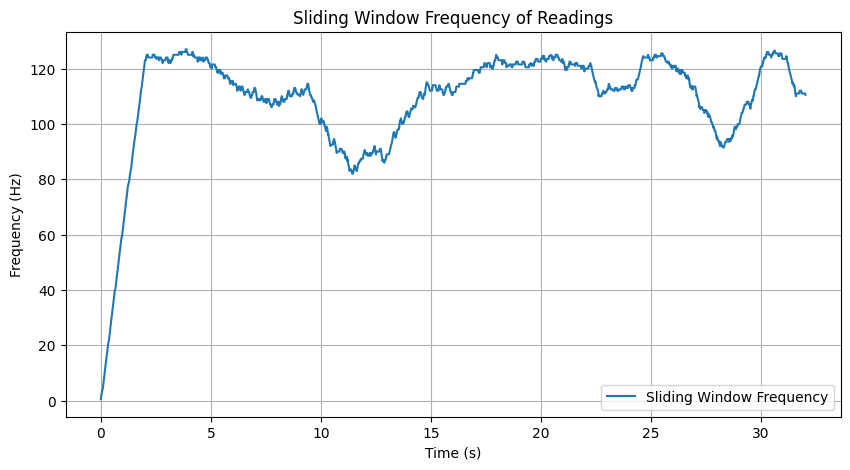

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the sliding window frequency calculation function
def sliding_window_frequency(df, window_size):
    time_diff = df["C4B0890D-F795-5936-5F56-28B4BC3AA9C8_time (s)"].diff()
    window_end = df["C4B0890D-F795-5936-5F56-28B4BC3AA9C8_time (s)"].max()
    frequency = []

    for end_time in df["C4B0890D-F795-5936-5F56-28B4BC3AA9C8_time (s)"]:
        start_time = max(0, end_time - window_size)
        window_data = df[(df["C4B0890D-F795-5936-5F56-28B4BC3AA9C8_time (s)"] >= start_time) & (df["C4B0890D-F795-5936-5F56-28B4BC3AA9C8_time (s)"] <= end_time)]
        freq = len(window_data) / window_size
        frequency.append(freq)

    return frequency

# Calculate the sliding window frequency
window_size = 2  # 2 seconds
df["frequency"] = sliding_window_frequency(df, window_size)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(df["C4B0890D-F795-5936-5F56-28B4BC3AA9C8_time (s)"], df["frequency"], label="Sliding Window Frequency")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Sliding Window Frequency of Readings")
plt.legend()
plt.grid(True)
plt.show()
